In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import random
import matplotlib.cm as cm

with open('pickles\List_of_radial_object_all_minutes_v3.pkl', 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)




In [8]:
print(len(loaded_radial_dist_list))

for list in loaded_radial_dist_list:
    print(len(list))


86400
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
1

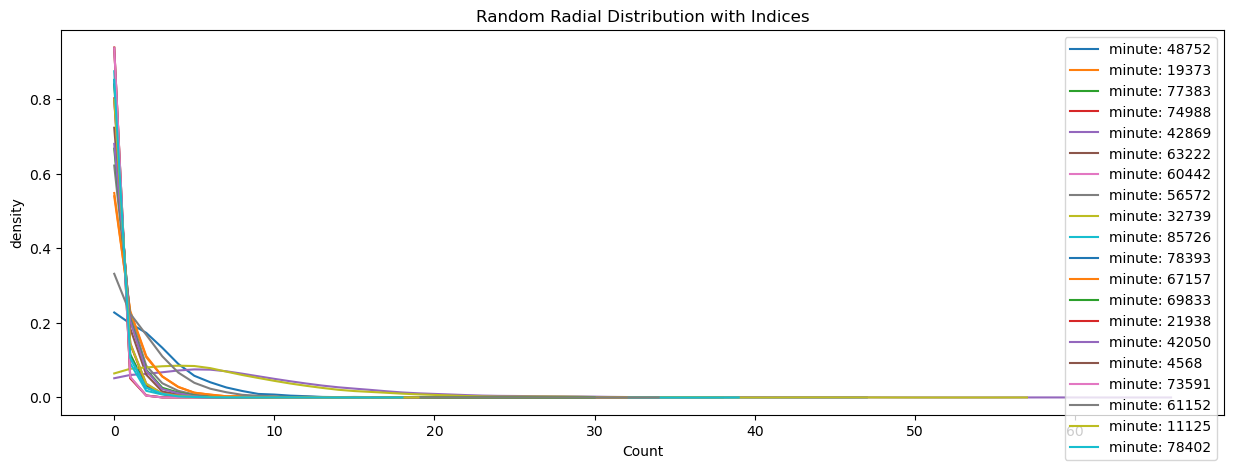

In [7]:
n_plots = 20
random_indices = random.sample(range(len(loaded_radial_dist_list)), n_plots)


plt.figure(figsize=(15, 5))
for idx in random_indices:
    rd = loaded_radial_dist_list[idx]
    plt.plot(rd, label=f'minute: {idx}')  
 



plt.legend()
plt.title('Random Radial Distribution with Indices')
plt.xlabel('Count')
plt.ylabel('density')
plt.show()